In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [2]:
data_fake = pd.read_csv("C:/Users/Arib Lokhandwala/Downloads/Fake.csv")
data_true = pd.read_csv("C:/Users/Arib Lokhandwala/Downloads/True.csv")

In [3]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
data_fake["class"] = 0
data_true['class'] = 1

In [6]:
data_fake.shape, data_true.shape

((23481, 5), (21417, 5))

In [7]:
data_fake_manual_testing = data_fake.tail(10) 
for i in range(23480,23470,-1): 
    data_fake.drop([i], axis=0, inplace = True)
    
    data_true_manual_testing = data_true.tail(10)
for i in range(21416,21406,-1):
    data_true.drop([i], axis=0, inplace=True)

In [8]:
data_fake.shape, data_true.shape

((23471, 5), (21407, 5))

In [9]:
data_fake_manual_testing['class'] = 0
data_true_manual_testing['class'] = 1

C:\Users\Arib Lokhandwala\AppData\Local\Temp\ipykernel_17616\277247672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing['class'] = 0
C:\Users\Arib Lokhandwala\AppData\Local\Temp\ipykernel_17616\277247672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing['class'] = 1


In [10]:
data_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [11]:
data_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [12]:
data_merge = pd.concat([data_fake, data_true],axis=0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [14]:
data_merge

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21402,Exclusive: Trump's Afghan decision may increas...,ON BOARD A U.S. MILITARY AIRCRAFT (Reuters) - ...,worldnews,"August 22, 2017",1
21403,U.S. puts more pressure on Pakistan to help wi...,WASHINGTON (Reuters) - The United States sugge...,worldnews,"August 21, 2017",1
21404,Exclusive: U.S. to withhold up to $290 million...,WASHINGTON (Reuters) - The United States has d...,worldnews,"August 22, 2017",1
21405,Trump talks tough on Pakistan's 'terrorist' ha...,ISLAMABAD (Reuters) - Outlining a new strategy...,worldnews,"August 22, 2017",1


In [15]:

data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [16]:
data = data_merge.drop(['title','subject','date'],axis=1)

In [17]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [18]:
# Jumble the dataset randomly and randomly giving index value to each row by changing their old index values
data = data.sample(frac = 1)

In [19]:
data.head() # 1-True news   0-False

,text,class
281,"Last night, congressional Republicans went aft...",0
13939,THE CENTER FOR IMMIGRATION STUDIES IS AMAZING ...,0
5112,"For decades, it seemed, when the nation imagin...",0
14030,"SOCHI, Russia (Reuters) - Russia s military fo...",1
14037,This video of conservative comedian Steven Cro...,0


In [20]:
# Once the rows are jumbled they have index values also jumbled. So this line provides new index to very row in oredr wise staring from 0 to end
data.reset_index(inplace = True) 
# Deleting previous index value which was jumbled and not sequential
data.drop(['index'], axis = 1, inplace = True)
# Now in our data rows are jumbled but index values starts from 0 to end

In [21]:
data.columns

Index(['text', 'class'], dtype='object')

In [22]:
data.head()

,text,class
0,"Last night, congressional Republicans went aft...",0
1,THE CENTER FOR IMMIGRATION STUDIES IS AMAZING ...,0
2,"For decades, it seemed, when the nation imagin...",0
3,"SOCHI, Russia (Reuters) - Russia s military fo...",1
4,This video of conservative comedian Steven Cro...,0


In [23]:
# Removing punctuation, lowering text, removing URLs , HTML tags, Digits,etc
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]','', text)
    text = re.sub("\\W", " ", text)
    text = re.sub('https?://\S+/www\.\S+','', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [24]:
data['text'] = data['text'].apply(wordopt)

In [25]:
x = data['text']
y = data['class']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25)

In [27]:
# The TF-IDF scores serve as numerical features that quantify the importance of each term in the document.
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()

# Fit and transform the training data
xv_train = vectorization.fit_transform(x_train)

# Transform the test data using the same vectorizer
xv_test = vectorization.transform(x_test)


In [28]:
# Importing logistic regression model from library
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [29]:
pred_lr = LR.predict(xv_test)

In [30]:
# calculates the accuracy score of the logistic regression model (LR) using the reserved testing data (x_test and y_test), which was split from the original data at the beginning 
LR.score(xv_test, y_test)

0.9879679144385026

In [31]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5941
           1       0.99      0.99      0.99      5279

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [32]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [33]:
pred_dt = DT.predict(xv_test)

In [34]:
DT.score(xv_test, y_test)

0.996078431372549

In [35]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5941
           1       0.99      0.99      0.99      5279

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [36]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier(random_state = 0)
GB.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [37]:
pred_gb = GB.predict(xv_test)

In [38]:
GB.score(xv_test, y_test)

0.9951871657754011

In [39]:
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5941
           1       0.99      1.00      0.99      5279

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [40]:
from sklearn.ensemble import RandomForestClassifier

RF =  RandomForestClassifier(random_state = 0)
RF.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [41]:
pred_rf = RF.predict(xv_test)

In [42]:
RF.score(xv_test, y_test)

0.9889483065953654

In [43]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5941
           1       0.99      0.99      0.99      5279

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [44]:
def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

def manual_testing(news):
    testing_news = {"text": [news]}  # Corrected syntax for dictionary initialization
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)  # Added missing assignment operator
    pred_DT = DT.predict(new_xv_test)  # Added missing assignment operator
    pred_GB = GB.predict(new_xv_test)  # Added missing assignment operator
    pred_RF = RF.predict(new_xv_test)  # Added missing assignment operator
    
    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_label(pred_LR[0]),
                                                                                                                output_label(pred_DT[0]),  
                                                                                                                output_label(pred_GB[0]),  
                                                                                                                output_label(pred_RF[0])))


In [51]:
news = str(input())
manual_testing(news)

WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trumpâ€™s administration decided not to appeal rulings that blocked his transgender ban. Two federal appeals courts, one in Washington and one in Virginia, last week rejected the administrationâ€™s request to put on hold orders by lower court judges requiring the military to begin accepting transgender recruits on Jan. 1. A Justice Department official said the administration will not challenge those rulings. â€œThe Department of Defense has announced that it will be releasing an independent study of these issues in the coming weeks. So rather than litigate this interim appeal before that occurs, the administration has decided to wait for DODâ€™s study and will continue to defend the presidentâ€™s lawful authority in District Court in the meantime,â€ the official said, speaking on

In [46]:
news = str(input())
manual_testing(news)

IDBI Bank Share Price Target, Stock Under Rs 100: Shares of IDBI Bank Limited, a finance institution under the ownership of Life Insurance Corporation of India, is one of the banks that has delivered multibagger return in the last one year.  At present, IDBI Bank shares trade below Rs 100. On Friday, the bank stock extended gains to the sixth consecutive session. It quoted in the green at Rs 89 apiece on NSE around 1 PM with nearly 73 lakh equities changing hands


LR Prediction: Not A Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Not A Fake News


In [47]:
news = str(input())
manual_testing(news)

SAO PAULO (Reuters) - Cesar Mata Pires, the owner and co-founder of Brazilian engineering conglomerate OAS SA, one of the largest companies involved in Brazil s corruption scandal, died on Tuesday. He was 68. Mata Pires died of a heart attack while taking a morning walk in an upscale district of S o Paulo, where OAS is based, a person with direct knowledge of the matter said. Efforts to contact his family were unsuccessful. OAS declined to comment. The son of a wealthy cattle rancher in the northeastern state of Bahia, Mata Pires  links to politicians were central to the expansion of OAS, which became Brazil s No. 4 builder earlier this decade, people familiar with his career told Reuters last year. His big break came when he befriended Antonio Carlos Magalh es, a popular politician who was Bahia governor several times, and eventually married his daughter Tereza. Brazilians joked that OAS stood for  Obras Arranjadas pelo Sogro  - or  Work Arranged by the Father-In-Law.   After years of

In [48]:
news = str(input())
manual_testing(news)

Manitoba s Criminal Code Review Board announced Friday it has given Will Baker, formerly known as Vince Li, an absolute discharge, meaning he is longer subject to monitoring.Baker, a diagnosed schizophrenic, killed Tim McLean, a young carnival worker who was a complete stranger to Baker, in 2008. A year later he was found not criminally responsible due to mental illness.McLean s mother, Carol de Delley, has been outspoken against granting Baker freedom, saying there would be no way to ensure he continued to take his medication.She declined comment in a post on Facebook Friday, saying  I have no words. Baker was initially kept in a secure wing of a psychiatric hospital but was given more freedom every year.He has been living on his own in a Winnipeg apartment since November, but was still subject to monitoring to ensure he took his medication.Baker s doctor, Jeffrey Waldman, told the board earlier this week that he is confident Baker will remain on his medication and will continue to wo

In [49]:
#  Real world News that is not fake. 
news = str(input())
manual_testing(news)

Prime Minister Narendra Modi has slammed the Congress party for dividing the society in the name of caste and uniting its vote bank through appeasement, saying that Rahul Gandhi has struck a deal in Kerala's Wayanad to give Muslims reservations if he is voted as an MP.   LR Prediction: Fake News  DT Prediction: Fake News  GBC Prediction: Fake News  RFC Prediction: Not A Fake News


LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Not A Fake News


In [50]:
data.head(10) # 1-True news   0-False

,text,class
0,karma it s a beautiful thing a massive makeshi...,0
1,ankara reuters turkey received bids last f...,1
2,in the wake of his failed efforts to sell the ...,0
3,every american taxpayer should be outraged at ...,0
4,msnbc s joy reid filled on all in with chris h...,0
5,beijing hanoi reuters china urged vietnam ...,1
6,the truth hurts the idea that there are peopl...,0
7,please rt until we identify this disgusting n...,0
8,the man running hillary clinton s campaign is ...,0
9,mexico city reuters supporters of u s rep...,1


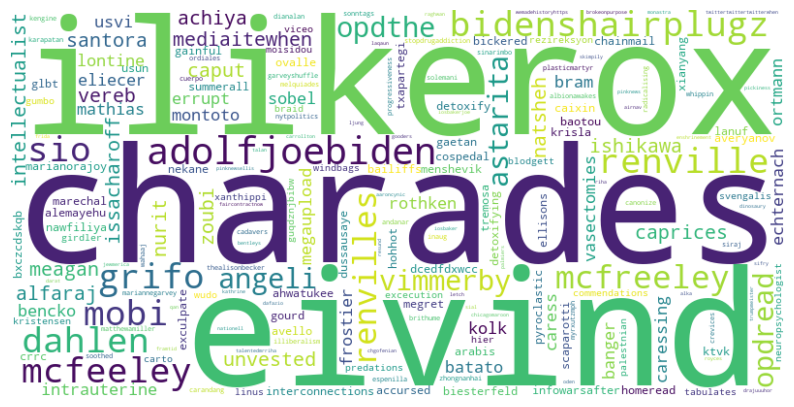

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming vectorization is your TfidfVectorizer object

# Convert TF-IDF scores to frequencies (for WordCloud)
tfidf_frequencies = {term: vectorization.idf_[index] for term, index in vectorization.vocabulary_.items()}

# Create a WordCloud object with desired parameters
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_frequencies)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.show()
